# Import data for cat and dog dataset:

Here we are splitting the data set for the cats and dogs into training set and test set.

In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df_train = pd.read_csv("train_data.csv") 
print(df_train.shape)

df_test = pd.read_csv("test_data.csv")
print(df_test.shape)

(1899, 201)
(790, 201)


In [3]:
df1_train = df_train.dropna()
print(df1_train.shape)

df1_test = df_test.dropna()
print(df1_test.shape)

(1899, 201)
(790, 201)


In [4]:
df2_train = df1_train.values
print(df2_train.shape)

df2_test = df1_test.values
print(df2_test.shape)

(1899, 201)
(790, 201)


In [5]:
X_train = df2_train[:,:200]
Y_train = df2_train[:,200]
X_test = df2_test[:,:200]
Y_test = df2_test[:,200]

# Logistic Regression

Here we will first use logistic regression to classify our data.

# Logistic Regression with Lasso (L1) Regularization

In [6]:
# Empty list to store values of training set accuracy.
acc_train_logreg = []

# Empty list to store values of test set accuracy.
acc_test_logreg = []

# Empty list to store different values of parameter 'c'.
c_logreg = []

In [7]:
def logreg_model(c , X_train, Y_train, X_test, Y_test, max_iter):
    # Using L1 penalty and saga solver
    logreg = linear_model.LogisticRegression(penalty='l1',C=c,solver='saga',max_iter=max_iter)
    
    # Fit the model on the training set
    logreg.fit(X_train,Y_train)
    
    # Find the prediction on training set
    Yhat_train = logreg.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set
    Yhat_test = logreg.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg.append(c)

In [8]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
print("Logistic Regression with Lasso (L1) Regularization")
print("==================================================")
for c in cVals:
    print("\n")
    print("For C value = %f:" % c)
    logreg_model(c, X_train, Y_train, X_test, Y_test, 3500)

Logistic Regression with Lasso (L1) Regularization


For C value = 0.000100:
Accuracy on training data = 0.631912
Accuracy on test data = 0.650633


For C value = 0.001000:
Accuracy on training data = 0.636651
Accuracy on test data = 0.659494


For C value = 0.010000:
Accuracy on training data = 0.823591
Accuracy on test data = 0.818987


For C value = 0.100000:
Accuracy on training data = 0.853607
Accuracy on test data = 0.834177


For C value = 1.000000:
Accuracy on training data = 0.860453
Accuracy on test data = 0.841772


For C value = 10.000000:
Accuracy on training data = 0.859926
Accuracy on test data = 0.843038


For C value = 100.000000:
Accuracy on training data = 0.859926
Accuracy on test data = 0.843038


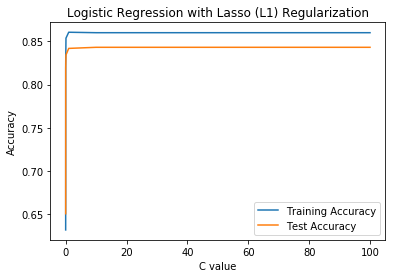

In [9]:
plt.title("Logistic Regression with Lasso (L1) Regularization")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.plot(c_logreg,acc_train_logreg)
plt.plot(c_logreg,acc_test_logreg)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

# Logistic Regression with Ridge (L2) Regularization

In [10]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

In [11]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test, max_iter):
    # Using L2 penalty
    logreg2 = linear_model.LogisticRegression(C=c,solver='liblinear',max_iter=max_iter)
    
    # Fit the model on the training set
    logreg2.fit(X_train, Y_train)
    
    # Find the prediction on training set
    Yhat_train = logreg2.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg2
    acc_train = logreg2.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set
    Yhat_test = logreg2.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg2
    acc_test = logreg2.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg2.append(c)

In [12]:
print("Logistic Regression with Ridge (L2) Regularization")
print("=================================================")
for c in cVals:
    print("\n")
    print("For C value = %f:" % c)
    logreg2_model(c, X_train, Y_train, X_test, Y_test, 100)

Logistic Regression with Ridge (L2) Regularization


For C value = 0.000100:
Accuracy on training data = 0.825698
Accuracy on test data = 0.830380


For C value = 0.001000:
Accuracy on training data = 0.856240
Accuracy on test data = 0.837975


For C value = 0.010000:
Accuracy on training data = 0.862559
Accuracy on test data = 0.826582


For C value = 0.100000:
Accuracy on training data = 0.862033
Accuracy on test data = 0.817722


For C value = 1.000000:
Accuracy on training data = 0.860453
Accuracy on test data = 0.817722


For C value = 10.000000:
Accuracy on training data = 0.860979
Accuracy on test data = 0.817722


For C value = 100.000000:
Accuracy on training data = 0.860979
Accuracy on test data = 0.817722


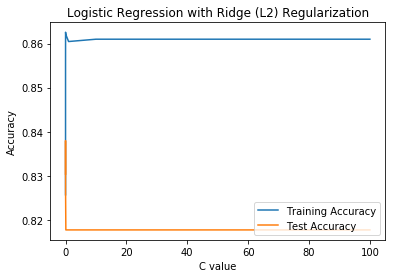

In [13]:
plt.title("Logistic Regression with Ridge (L2) Regularization")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.plot(c_logreg2, acc_train_logreg2)
plt.plot(c_logreg2, acc_test_logreg2)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

# Logistic Regression Using Polynomial Feature Transformation

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# Object of PolynomialFeatures(2)
poly = PolynomialFeatures(2)

In [16]:
# Transformed data matrices
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

Logistic Regression with Lasso using Polynomial Feature Transformation


For C value = 0.000100:


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.642970
Accuracy on test data = 0.645570


For C value = 0.001000:


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.639810
Accuracy on test data = 0.653165


For C value = 0.010000:


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.639810
Accuracy on test data = 0.654430


For C value = 0.100000:


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.639284
Accuracy on test data = 0.654430


For C value = 1.000000:


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.639284
Accuracy on test data = 0.654430


For C value = 10.000000:


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.639810
Accuracy on test data = 0.654430


For C value = 100.000000:


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.639284
Accuracy on test data = 0.654430


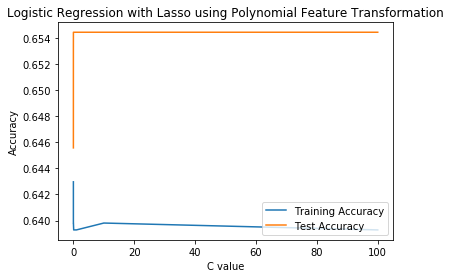

In [17]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

# Logistic Regression with Lasso using Polynomial Feature Transformation
print("Logistic Regression with Lasso using Polynomial Feature Transformation")
print("======================================================================")
for c in cVals:
    print("\n")
    print("For C value = %f:" % c)
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test, 100)

plt.title("Logistic Regression with Lasso using Polynomial Feature Transformation")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.plot(c_logreg,acc_train_logreg)
plt.plot(c_logreg,acc_test_logreg)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

Logistic Regression with Ridge using Polynomial Feature Transformation


For C value = 0.000100:


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on training data = 0.864139
Accuracy on test data = 0.834177


For C value = 0.001000:


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on training data = 0.856240
Accuracy on test data = 0.836709


For C value = 0.010000:


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on training data = 0.857293
Accuracy on test data = 0.835443


For C value = 0.100000:


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on training data = 0.867825
Accuracy on test data = 0.836709


For C value = 1.000000:


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on training data = 0.855187
Accuracy on test data = 0.831646


For C value = 10.000000:


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on training data = 0.858346
Accuracy on test data = 0.834177


For C value = 100.000000:


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on training data = 0.858346
Accuracy on test data = 0.829114


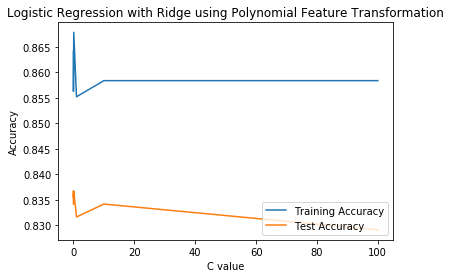

In [18]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

# Logistic Regression with Ridge using Polynomial Feature Transformation
print("Logistic Regression with Ridge using Polynomial Feature Transformation")
print("======================================================================")
for c in cVals:
    print("\n")
    print("For C value = %f:" % c)
    logreg2_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test, 100)

plt.title("Logistic Regression with Ridge using Polynomial Feature Transformation")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.plot(c_logreg2, acc_train_logreg2)
plt.plot(c_logreg2, acc_test_logreg2)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

# Support Vector Machines (SVM)

# SVM using Linear Kernel

In [19]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

In [20]:
from sklearn import svm

def svm_linear(c):
    # SVM using Linear Kernel
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    # Fit the classifier on the training set
    svc_linear.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)

In [21]:
# Large C values take extremely long and have been removed
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
print("SVM using Linear Kernel")
print("=======================")
for c in cVals:
    print("\n")
    print("For C value = %f:" % c)
    svm_linear(c)

SVM using Linear Kernel


For C value = 0.000100:
Train Accuracy = 0.818852
Test Accuracy = 0.822785


For C value = 0.001000:
Train Accuracy = 0.861506
Test Accuracy = 0.832911


For C value = 0.010000:
Train Accuracy = 0.874144
Test Accuracy = 0.816456


For C value = 0.100000:
Train Accuracy = 0.878884
Test Accuracy = 0.811392


For C value = 1.000000:
Train Accuracy = 0.876777
Test Accuracy = 0.801266


For C value = 10.000000:
Train Accuracy = 0.878357
Test Accuracy = 0.805063


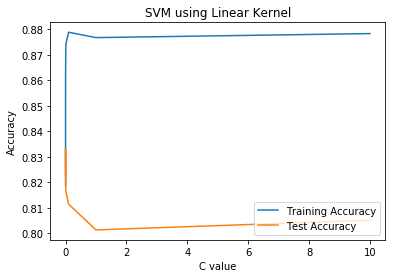

In [22]:
plt.title("SVM using Linear Kernel")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.plot(c_svm_linear, acc_train_svm_linear)
plt.plot(c_svm_linear, acc_test_svm_linear)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

# SVM using Radial Basis Function(RBF) Kernel

In [23]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

In [24]:
def svm_rbf(c):
    # SVM using RBF
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, gamma = 'auto')
    
    # Fit the classifier on the training set
    svc_rbf.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train, Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test, Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_rbf.append(c)

In [25]:
print("SVM using Radial Basis Function (RBF) Kernel")
print("============================================")
for c in cVals:
    print("\n")
    print("For C value = %f:" % c)
    svm_rbf(c)

SVM using Radial Basis Function (RBF) Kernel


For C value = 0.000100:
Train Accuracy = 0.631912
Test Accuracy = 0.650633


For C value = 0.001000:
Train Accuracy = 0.631912
Test Accuracy = 0.650633


For C value = 0.010000:
Train Accuracy = 0.631912
Test Accuracy = 0.650633


For C value = 0.100000:
Train Accuracy = 0.631912
Test Accuracy = 0.650633


For C value = 1.000000:
Train Accuracy = 0.995787
Test Accuracy = 0.687342


For C value = 10.000000:
Train Accuracy = 1.000000
Test Accuracy = 0.686076


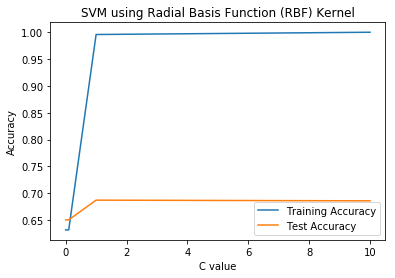

In [26]:
plt.title("SVM using Radial Basis Function (RBF) Kernel")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.plot(c_svm_rbf, acc_train_svm_rbf)
plt.plot(c_svm_rbf, acc_test_svm_rbf)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

# SVM using Polynomial Kernel

In [27]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [28]:
def svm_polynomial(c):
    # SVM using Polynomial Kernel
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c, gamma = 'auto')
    
    A = np.concatenate((X_train[0:150,:], X_train[-150:,:]))  # First 150 rows and last 150 rows of training set.
    B = np.concatenate((Y_train[0:150], Y_train[-150:]))
    C = np.concatenate((X_test[0:50,:], X_test[-50:,:]))   # First 50 rows and last 50 rows of test set.
    D = np.concatenate((Y_test[0:50], Y_test[-50:]))
    
    # Fit the classifier on the training set
    svc_polynomial.fit(A, B)
    
    # Find the prediction and accuracy on the training set
    Yhat_svc_poly_train = svc_polynomial.predict(A)
    acc_train = svc_polynomial.score(A, B)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set
    Yhat_svc_poly_test = svc_polynomial.predict(C)
    acc_test = svc_polynomial.score(C, D)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)

In [29]:
cVals = np.geomspace(0.000001, 0.001, 5)
print("SVM using Polynomial Kernel")
print("===========================")
for c in cVals:
    print("\n")
    print("For C value = %f:" % c)
    svm_polynomial(c)

SVM using Polynomial Kernel


For C value = 0.000001:
Train Accuracy = 0.566667
Test Accuracy = 0.580000


For C value = 0.000006:
Train Accuracy = 0.680000
Test Accuracy = 0.650000


For C value = 0.000032:
Train Accuracy = 0.716667
Test Accuracy = 0.690000


For C value = 0.000178:
Train Accuracy = 0.853333
Test Accuracy = 0.730000


For C value = 0.001000:
Train Accuracy = 0.940000
Test Accuracy = 0.770000


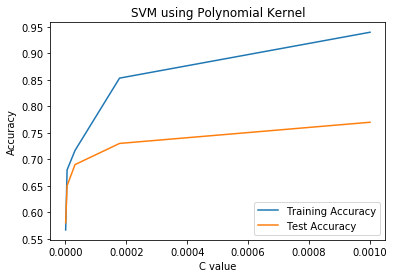

In [30]:
plt.title("SVM using Polynomial Kernel")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.plot(c_svm_poly, acc_train_svm_poly)
plt.plot(c_svm_poly, acc_test_svm_poly)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()